**Dataset Source:**
1.   https://www.kaggle.com/datasets/naurosromim/bdshs
2.   https://github.com/naurosromim/hate-speech-dataset-for-bengali-social-media
3.   https://paperswithcode.com/paper/bd-shs-a-benchmark-dataset-for-learning-to

- Task A	HS detection
- Task B	HS target detection
- Task C	HS type detection

# Prerequisites

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

trainDf  = pd.read_csv('/content/drive/MyDrive/PR/Dataset/train.csv')
testDf  = pd.read_csv('/content/drive/MyDrive/PR/Dataset/test.csv')
valDf  = pd.read_csv('/content/drive/MyDrive/PR/Dataset/val.csv')

trainDf.head()

,sentence,target,type,hate speech
0,.... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1


## New Section

In [ ]:
trainDf.describe()

,hate speech
count,40224.000000
mean,0.480410
std,0.499622
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40224 entries, 0 to 40223
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentence     40224 non-null  object
 1   target       19324 non-null  object
 2   type         19324 non-null  object
 3   hate speech  40224 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
trainDf.groupby(by="type").sum()

,hate speech
type,
callToViolence,2020
callToViolence_gender,487
callToViolence_gender_religion,10
callToViolence_gender_religion_slander,2
callToViolence_gender_slander,77
callToViolence_religion,184
callToViolence_religion_slander,101
callToViolence_slander,2914
gender,2376


In [ ]:
trainDf.groupby(by="target").sum()

,hate speech
target,
female,4093
female_group,18
group,2486
ind,7057
ind_female,10
ind_group,5
ind_male,1
male,5413
male_female,225


In [ ]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentence     5029 non-null   object
 1   target       2416 non-null   object
 2   type         2416 non-null   object
 3   hate speech  5029 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 157.3+ KB


In [ ]:
valDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentence     5028 non-null   object
 1   target       2416 non-null   object
 2   type         2416 non-null   object
 3   hate speech  5028 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 157.2+ KB


In [ ]:
#rows
trainDf.shape[0]

40224

In [ ]:
#rows
testDf.shape[0]

5029

In [ ]:
#rows
valDf.shape[0]

5028

In [ ]:
trainDf['hate speech'][0]

1

# Preprocessing

### bnaug

In [ ]:
!pip install bnaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from bnaug.sentence import BackTranslation

bt = BackTranslation()

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Downloading:   0%|          | 0.00/766 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/990M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/766 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/990M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

In [ ]:
# text = "মজার সব ফানি ভিডিও দেখতে অামার Youtube channel টি থেকে ঘুরে অাসতে পারেন....অগ্রিম ধন্যবাদ।"
# output = bt.get_augmented_sentences(text)
# print(output)

In [ ]:
# def isEnglish(s):
#   return s.isascii()

# def convert(lst):
#     return ([i for i in lst.split()])

# # Driver code
# lst =  'মজার সব ফানি ভিডিও দেখতে অামার Youtube channel টি থেকে ঘুরে অাসতে পারেন....অগ্রিম ধন্যবাদ।'
# words = convert(lst)
# empt = ''
# space = 0
# for w in words:
#   if isEnglish(w) == True:
#     output = bt.get_augmented_sentences(w)
#     if space == 0:
#       empt = "".join([empt, output[0]])
#       space  =1
#     else: 
#       empt = " ".join([empt, output[0]])
#   else:
#     if space == 0:
#       empt = "".join([empt, w])
#       space = 1
#     else: 
#       empt = " ".join([empt, w])

# nt = aText =  normalize(remove_URL(remove_html(remove_emojis(empt))), url_replacement=None)
# print(nt)

## Preprocessing

In [ ]:
!pip install git+https://github.com/csebuetnlp/normalizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-3itz22y1
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-3itz22y1
  Resolved https://github.com/csebuetnlp/normalizer to commit d80c3c484e1b80268f2b2dfaf7557fe65e34f321
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6883 sha256=1f4676df4399f6f4880ee1a1889cb9e3b28bac6971bd871095a82052cf0c5226
  Stored in directory: /tmp/pip-ephem-wheel-cache-u7zcyg8k/wheels/8e/25/ac/a3666919774bd6e5a7818bc8630b4cfce6b3900f6299a261b6
  Created wheel for emoji

In [ ]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from translate import Translator
translatorBn = Translator(from_lang="en",to_lang="bn")
from normalizer import normalize

In [ ]:
import re
from urllib.parse import urlparse

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_html(string):
    regex = re.compile(r'<[^>]+>')
    return regex.sub('', string)

def remove_URL(text):
    """Remove URLs from a text string"""
    text = re.sub(r"http\S+", "", text)
    lst = [l for l in text.split() if not urlparse(l).scheme]
    return ' '.join(lst)

def isEnglish(s):
  return s.isascii()

def convert(lst):
    return ([i for i in lst.split()])

### Run to clean

#### test purpose

In [ ]:
# trainRows = trainDf.shape[0]

# for i in range(trainRows):
#   # Driver code
#   lst = normalize(remove_URL(remove_html(remove_emojis(trainDf['sentence'][i]))), url_replacement=None)
#   words = convert(lst)
#   empt = ''
#   space = 0
#   for w in words:
#     if isEnglish(w) == True:
#       output = bt.get_augmented_sentences(w)
#       if space == 0:
#         empt = "".join([empt, output[0]])
#         space  =1
#       else: 
#         empt = " ".join([empt, output[0]])
#     else:
#       if space == 0:
#         empt = "".join([empt, w])
#         space = 1
#       else: 
#         empt = " ".join([empt, w])

#   print(i, ' ', empt)

#   # if i == 10:
#   #   break

Streaming output truncated to the last 5000 lines.
35224   মক্কা মদিনা আমদের আদর্শ হবে কেন? মুসলমান দের আদর্শ হল কুরআন সুন্নাহ নবি মুহাম্মাদ সল্লাল্লাহু আলাইহি ওয়া সাল্লাম। কোন দেশ কি করে দেখে লাভ আছে? মুসলিম দের লক্ষ্য জান্নাতে যাওয়া আল্লাহ সকল হুকুম আহকাম মেনে। এটা ত এক্ টা ছোট বাচ্চা ও জানে। শুধু চা তে গোফ ভিজিয়ে ভিজিয়ে খেলে হবে না তো
35225   মগা চরম মগা
35226   মজনুকে নিয়ে ভিডিও চাই।
35227   মজা টিবি কে
35228   মজা তুমিও পাইচো সারেও পাইচে ঠিক আচে
35229   মজা তুমিও পাইছ আমিও পাইছি  -! জ্ঞান হারানোর কি আছে
35230   মজা তুমিও পাইছো আমিও পাইছি ঠিক আছে
35231   মজা তুমিও পাইছো আমিও পাইছি। তাতে লজ্জা থাকার কিছুই না। হয়তো তুমি জোর করে খুলতে তাই আমি নিজেই আগে খুলে দিলাম।
35232   মজা তুমিও পাইছো ও পাইছে! এখন এই সব বলে লাভ কি
35233   মজা দিলা ভাই
35234   মজা দেওয়ার জন্য স্লাপ না দিয়ে এমনিতেই ফান করে মজা দিতে পারতো। অযথা একে অন্যকে ব্যথা দিয়ে এমন মজার মানে হয় না।
35235   মজা নেওয়ার জন্য কমেন্ট গুলা পড়ি
35236   মজা পাইছি কমেন্ট পোড়ে
35237   মজা পাইছি ভাই কিন্তু তাসকিন ভাই এসব খেলার 

### trainDf

In [ ]:
trainDf

,sentence,target,type,hate speech
0,.... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1
...,...,...,...,...
40219,��� গানটা চালু করে ওয়াস রুমে গিয়েছিলাম! এসে দে...,NaN,NaN,0
40220,���� হালকার উপজেলা ঝাপসা,NaN,NaN,0
40221,���� ��,NaN,NaN,0
40222,���� ��পুরাই আগুনের গুলা� () ��,NaN,NaN,0


In [ ]:
trainDf['sentence'][35253]

'মজার সব ফানি ভিডিও দেখতে অামার Youtube channel টি থেকে ঘুরে অাসতে পারেন....অগ্রিম ধন্যবাদ। <a href="https://www.youtube.com/channel/UCfmMRMaVFbHBqYZ2v-xIp1w">https://www.youtube.com/channel/UCfmMRMaVFbHBqYZ2v-xIp1w</a>'

In [ ]:
# Create empty DataFrame
cleanTrainDf = pd.DataFrame(columns = ["sentence", "target",	"type",	"hateSpeech"])

trainRows = trainDf.shape[0]

for i in range(trainRows):
  # Driver code
  lst = normalize(remove_URL(remove_html(remove_emojis(trainDf['sentence'][i]))), url_replacement=None)
  words = convert(lst)
  empt = ''
  space = 0
  for w in words:
    if isEnglish(w) == True:
      output = bt.get_augmented_sentences(w)
      if space == 0:
        empt = "".join([empt, output[0]])
        space  =1
      else: 
        empt = " ".join([empt, output[0]])
    else:
      if space == 0:
        empt = "".join([empt, w])
        space = 1
      else: 
        empt = " ".join([empt, w])

  aText = empt

  cleanTrainDf.loc[i] = [aText, trainDf['target'][i], trainDf['type'][i], trainDf['hate speech'][i]]
  print(i, ' ', empt)

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 128 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
35224   মক্কা মদিনা আমদের আদর্শ হবে কেন? মুসলমান দের আদর্শ হল কুরআন সুন্নাহ নবি মুহাম্মাদ সল্লাল্লাহু আলাইহি ওয়া সাল্লাম। কোন দেশ কি করে দেখে লাভ আছে? মুসলিম দের লক্ষ্য জান্নাতে যাওয়া আল্লাহ সকল হুকুম আহকাম মেনে। এটা ত এক্ টা ছোট বাচ্চা ও জানে। শুধু চা তে গোফ ভিজিয়ে ভিজিয়ে খেলে হবে না তো
35225   মগা চরম মগা
35226   মজনুকে নিয়ে ভিডিও চাই।
35227   মজা টিবি কে
35228   মজা তুমিও পাইচো সারেও পাইচে ঠিক আচে
35229   মজা তুমিও পাইছ আমিও পাইছি  -! জ্ঞান হারানোর কি আছে
35230   মজা তুমিও পাইছো আমিও পাইছি ঠিক আছে
35231   মজা তুমিও পাইছো আমিও পাইছি। তাতে লজ্জা থাকার কিছুই না। হয়তো তুমি জোর করে খুলতে তাই আমি নিজেই আগে খুলে দিলাম।
35232   মজা তুমিও পাইছো ও পাইছে! এখন এই সব বলে লাভ কি
35233   মজা দিলা ভাই
35234   মজা দেওয়ার জন্য স্লাপ না দিয়ে এমনিতেই ফান করে মজা দিতে পারতো। অযথা একে অন্যকে ব্যথা দিয়ে এমন মজার মানে হয় না।
35235   মজা নেওয়ার জন্য কমেন্ট গুলা পড়ি
35236   মজা পাইছি কমেন্ট পোড়ে
35237   মজা পাইছি ভাই কিন্তু তাসকিন ভাই এসব খেলার 

In [ ]:
cleanTrainDf

,sentence,target,type,hateSpeech
0,... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খা...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1
...,...,...,...,...
40219,গানটা চালু করে ওয়াস রুমে গিয়েছিলাম! এসে দেখি...,NaN,NaN,0
40220,হালকার উপজেলা ঝাপসা,NaN,NaN,0
40221,,NaN,NaN,0
40222,পুরাই আগুনের গুলা (),NaN,NaN,0


In [ ]:
trainDf['sentence'][35253]

'মজার সব ফানি ভিডিও দেখতে অামার Youtube channel টি থেকে ঘুরে অাসতে পারেন....অগ্রিম ধন্যবাদ। <a href="https://www.youtube.com/channel/UCfmMRMaVFbHBqYZ2v-xIp1w">https://www.youtube.com/channel/UCfmMRMaVFbHBqYZ2v-xIp1w</a>'

In [ ]:
cleanTrainDf['sentence'][35253]

'মজার সব ফানি ভিডিও দেখতে আমার  ইউটিউব  নদী টি থেকে ঘুরে আসতে পারেন....অগ্রিম ধন্যবাদ।'

In [ ]:
cleanTrainDf.to_csv('/content/drive/MyDrive/PR/Dataset/cleanTrain.csv')

### testDf

In [ ]:
# TestDf
# Create empty DataFrame
cleanTestDf = pd.DataFrame(columns = ["sentence", "target",	"type",	"hateSpeech"])

testRows = testDf.shape[0]

for i in range(testRows):
  # Driver code
  lst = normalize(remove_URL(remove_html(remove_emojis(testDf['sentence'][i]))), url_replacement=None)
  words = convert(lst)
  empt = ''
  space = 0
  for w in words:
    if isEnglish(w) == True:
      output = bt.get_augmented_sentences(w)
      if space == 0:
        empt = "".join([empt, output[0]])
        space  =1
      else: 
        empt = " ".join([empt, output[0]])
    else:
      if space == 0:
        empt = "".join([empt, w])
        space = 1
      else: 
        empt = " ".join([empt, w])

  aText = empt
  cleanTestDf.loc[i] = [aText, testDf['target'][i], testDf['type'][i], testDf['hate speech'][i]]
  print(i)

cleanTestDf

0


/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 128 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283


,sentence,target,type,hateSpeech
0,। গরুর বাচ্চা কুকুরের বাচ্চা,ind,slander,1
1,অন্যায় দাবি করছে ক্রিকেটাররা অথচ দোষ নাকি বোর...,ind,religion,1
2,আইসিসিকে এই তথ্য দিলো কে?শুওরের বাচ্চা পাপন,male,slander,1
3,আওয়ামীলীগ ভারতের দালাল। মোদি নির্বাচিত হওয়ার...,group,slander,1
4,আগারওয়াল পিউর বাস্টার্ড এর কিছু হবে না???,ind,slander,1
...,...,...,...,...
5024,হেট লাইন কি দিছোফালতু হেট লাইন দেয়ার জন্যআইন ...,NaN,NaN,0
5025,হ্যা অবশ্যই পারবে শাকিব খান যেমন সুন্দর স্মার্...,NaN,NaN,0
5026,হ্যাঁ ক্ষমা করে দিয়েছি রানু দিকে,NaN,NaN,0
5027,হ্যাঁ পমিতের যাব যেন শাকিব খানের উপজেলা এক হয়...,NaN,NaN,0


In [ ]:
cleanTestDf.to_csv('/content/drive/MyDrive/PR/Dataset/cleanTest.csv')

### valDf

In [ ]:
# Create empty DataFrame
cleanValDf = pd.DataFrame(columns = ["sentence", "target",	"type",	"hateSpeech"])

valRows = valDf.shape[0]

for i in range(valRows):
  # Driver code
  lst = normalize(remove_URL(remove_html(remove_emojis(valDf['sentence'][i]))), url_replacement=None)
  words = convert(lst)
  empt = ''
  space = 0
  for w in words:
    if isEnglish(w) == True:
      output = bt.get_augmented_sentences(w)
      if space == 0:
        empt = "".join([empt, output[0]])
        space  =1
      else: 
        empt = " ".join([empt, output[0]])
    else:
      if space == 0:
        empt = "".join([empt, w])
        space = 1
      else: 
        empt = " ".join([empt, w])

  aText = empt
  cleanValDf.loc[i] = [aText, valDf['target'][i], valDf['type'][i], valDf['hate speech'][i]]
  print(i)

cleanValDf

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 128 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
2

,sentence,target,type,hateSpeech
0,- চ্যার দয়া করে বমি করার সময় পলিথিনে করবেন ...,male,slander,1
1,", জাফর সার অবশ্যই জ্ঞানী মানুষ, বাট এক কুখ্যাত...",male,religion_slander,1
2,কি? এই মাইয়া আমার লাগবো লাগবো কি? নাইলে রাত...,female,callToViolence_gender,1
3,।। জবর ইকবাল তুমি আমার বালের টিচার।। তোর রিয়ে...,male,slander,1
4,#দালাল #দলকানা #যাফ্রিকবাল,male,slander,1
...,...,...,...,...
5023,হে বাংলার সাহসী সেনাবাহিনীরা তোমরা কি এখনো ঘুম...,NaN,NaN,0
5024,হেআল্লাহ সব তোমাৰ হাতেতুমি ৰক্ষা কৰবেএবংহাজাৰ ...,NaN,NaN,0
5025,হ্যা এই মেয়ে লাইভে আসো,NaN,NaN,0
5026,হ্যািপ ঠিক কাজ করেছে।এই মত আমি জীবনে ভালোবাসা ...,NaN,NaN,0


In [ ]:
cleanValDf.to_csv('/content/drive/MyDrive/PR/Dataset/cleanVal.csv')

- **Have some null value rows to remove.**

# Wordcloud

- [Ref](https://colab.research.google.com/drive/15h32YuSQ5YwVji8OynC9BvMaWGpsWyD2?usp=sharing)

### Import necessary libraries

In [ ]:
!pip install wordcloud
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.9 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import numpy as np
import pandas as pd
import cv2
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bnlp.corpus import stopwords, punctuations

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Inspect the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PR/Dataset/cleanTrain.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['Unnamed: 0', 'sentence', 'target', 'type', 'hateSpeech'], dtype='object')
(40224, 5)


,Unnamed: 0,sentence,target,type,hateSpeech
0,0,... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,2,মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খা...,female,callToViolence,1
4,4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1


### Prepare the text data

In [ ]:
def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    return text
cleaned_text = df['sentence'].apply(lambda x: clean(str(x)))

In [ ]:
refined_sentence = " ".join(cleaned_text)

### Prepare mask

In [ ]:
def get_mask(img_path):
    img = cv2.imread(img_path, -1)
    if img.shape[2] == 3:
        return img
    return cv2.bitwise_not(img[:, :, 3])

### Download Bengali font

In [ ]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2023-01-20 18:35:15--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf’

kalpurush.ttf       100%[===================>] 307.22K   418KB/s    in 0.7s    

2023-01-20 18:35:17 (418 KB/s) - ‘kalpurush.ttf’ saved [314592/314592]



### Generate Word cloud

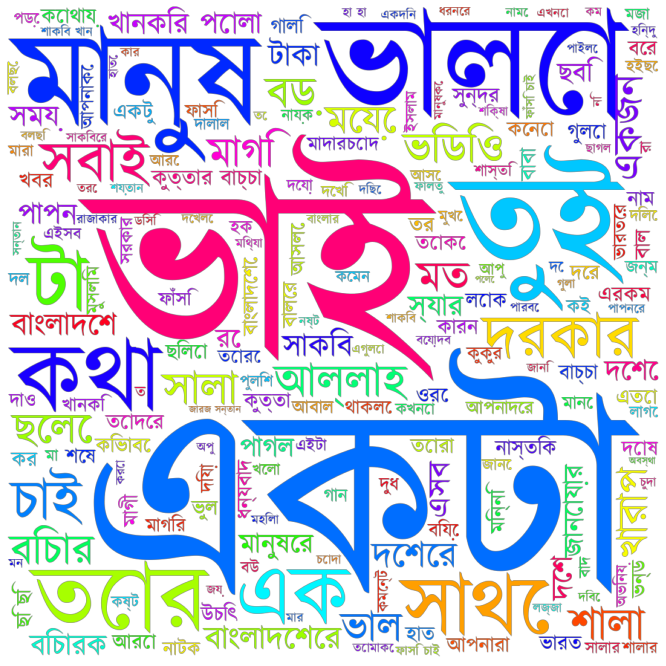

In [ ]:
mask = get_mask("/content/pikachu01.png")
regex = r"[\u0980-\u09FF]+"
wc = WordCloud(width=800, height=400,
               mode="RGBA", 
               background_color=None,
               colormap="hsv", 
               mask=mask,
               stopwords = stopwords,
               font_path="kalpurush.ttf",
               regexp=regex).generate(refined_sentence)
plt.figure(figsize=(25, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
result = wc.to_file("Bengali_word_cloud.png")

# Ignore: Extra to do (Incomplete)

## New Section

In [ ]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 KB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.7 MB/s eta 0:00:00


In [ ]:
import nlpaug.flow as naf
import nlpaug.augmenter.word as naw

In [ ]:
# text = "What is your recommended book on Bayesian Statistics?"
text = "মজার সব ফানি ভিডিও দেখতে আমার  ইউটিউব  নদী টি থেকে ঘুরে আসতে পারেন....অগ্রিম ধন্যবাদ।"

In [ ]:
TOPK=20 #default=100
ACT = 'insert' #"substitute"
 
aug_bert = naw.ContextualWordEmbsAug(
    model_path='distilbert-base-uncased', 
    # device='cuda',
    action=ACT, top_k=TOPK)

aug_w2v = naw.WordEmbsAug(
    model_type='glove', no_header=True, model_path='/content/drive/MyDrive/PR/glove.6B.300d.txt',
    action="substitute")

TypeError: ignored

In [ ]:
aug = naf.Sequential([
    aug_bert,aug_w2v
])

aug.augment(text, n=10)

In [ ]:
aug = naf.Sequential([
    aug_bert,aug_w2v
])

aug.augment(text, n=10)

['what never comes sort touch highest recommended book on bayesian statistics?',
 'what longer doing current recommended translation focusing on evolutionary bayesian comparison?',
 'what means this our consistently recommended book march probability bayesian statistics?',
 'see lot kind is guess your recommended paperback last bayesian statistics?',
 'that is currently your consideration scientific book however on bayesian statisticians?',
 'what is me rather recommended describing focusing sunday bayesian growth statistics?',
 'what kind is rest instead most recommended book taking probability statistics?',
 'what true whatever asked survey article series on bayesian empirical statistics?',
 'what is kids latest recommended guide printed unit end bayesian statistics?',
 '• now value is has your recommended volumes may bayesian statistics?']

In [ ]:
!pip install google-cloud-core
!pip install google-cloud-datastore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
aug = naf.Sometimes([
    aug_bert,aug_w2v
],aug_p=0.5, pipeline_p=0.5)

aug.augment(text, n=10)

TypeError: ignored

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

from nlpaug.util import Action

In [ ]:
aug = naf.Sometimes([
    nac.RandomCharAug(action="delete"),
    nac.RandomCharAug(action="insert"),
    naw.RandomWordAug()
])

aug.augment(text)

['া র ফ া ন ি ভ ড ি ও দ ে খত আম া র ইউট ি উব নদ ী ট ে ক ে ঘ ু র ে আসত ে প া র ে ন. .. . অগ ্ র ি ম ্ দ ।']

In [ ]:
naw.SynonymAug(aug_src='wordnet',aug_max=2).augment(text,n=5)

["What is your recommended al qur'an on Bayesian Statistics?",
 'What be your recommended book on Bayesian Statistics?',
 'What be your recommended book on Bayesian Statistics?',
 'What is your recommended book on Bayesian Statistic?',
 'What is your recommended book on Bayesian Statistics?']

In [ ]:
import nlpaug
import nlpaug.augmenter.word as naw
aug = naw.SynonymAug(aug_src='wordnet',aug_max=2)
aug.augment("Misleading reviews. Worst coffee ever had, and sorely disappointing vibe.",n=2)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['Misleading reviews. Worst coffee berry ever had, and sorely disappointing vibe.',
 'Misleading review article. Worst coffee ever had, and sorely disappointing vibration.']

In [ ]:
text = "আমি বুঝতে পেরেছি"

In [ ]:
aug.augment(text,n=5)

['আম ব ু ঝত প ে র ে',
 'আম ব ু ে প ে ছ ি',
 'আম ি ব ে ে র ে ছ',
 'ি ব ু ে ে র ছ ি',
 'আম ি ঝত ে প র ছ ি']

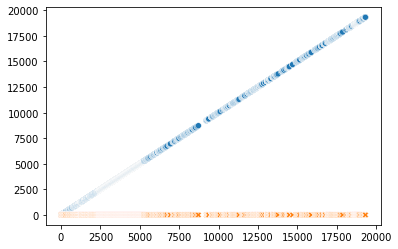

In [ ]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns


# data
data = df.loc[df.target == 'female']

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, legend=False, sizes=(20, 2000))

# show the graph
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math

# Load data, define hover text and bubble size
data = px.data.gapminder()
df_2007 = data[data['year']==2007]
df_2007 = df_2007.sort_values(['continent', 'country'])

hover_text = []
bubble_size = []

for index, row in df_2007.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Life Expectancy: {lifeExp}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population: {pop}<br>'+
                      'Year: {year}').format(country=row['country'],
                                            lifeExp=row['lifeExp'],
                                            gdp=row['gdpPercap'],
                                            pop=row['pop'],
                                            year=row['year']))
    bubble_size.append(math.sqrt(row['pop']))

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

# Dictionary with dataframes for each continent
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continent_data = {continent:df_2007.query("continent == '%s'" %continent)
                              for continent in continent_names}

# Create figure
fig = go.Figure()

for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['gdpPercap'], y=continent['lifeExp'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

TypeError: ignored

- **text ogmentation**
- **Important** https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
- https://towardsdatascience.com/advanced-visualisations-for-text-data-analysis-fc8add8796e2
- https://medium.com/plotly/nlp-visualisations-for-clear-immediate-insights-into-text-data-and-outputs-9ebfab168d5b